## Importing required libraries and data
     
    Data can be fetched from  Argopy directly (link is given below) as well, here I fetched data before and saved it as netCDF file. 
   <https://argopy.readthedocs.io/en/latest/data_fetching.html>

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

# import pyxpcm
# import cartopy.crs as ccrs
import matplotlib.pyplot as plt
# import netCDF4 as nc
import seaborn as sns
# s cfeature
import cmocean

In [2]:
ds7 =xr.open_dataset("/home/cccr/shikha/MAYUR/Project/Data/30_120_30S_30N_0_1000_2010-01-01_2019-12-31_erddap.nc")
ds7

<xarray.Dataset>
Dimensions:                (N_LEVELS: 1002, N_PROF: 163131)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 ... 997 998 999 1000 1001
  * N_PROF                 (N_PROF) int64 3016 9397 2000 5890 ... 1170 8905 3095
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    DATA_MODE              (N_PROF) object ...
    DIRECTION              (N_PROF) object ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    ...                     ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

## Plotting the fetched data

Text(0.5, 0.98, 'Variables  randomaly selected 50 Profiles from 2010 to 2019')

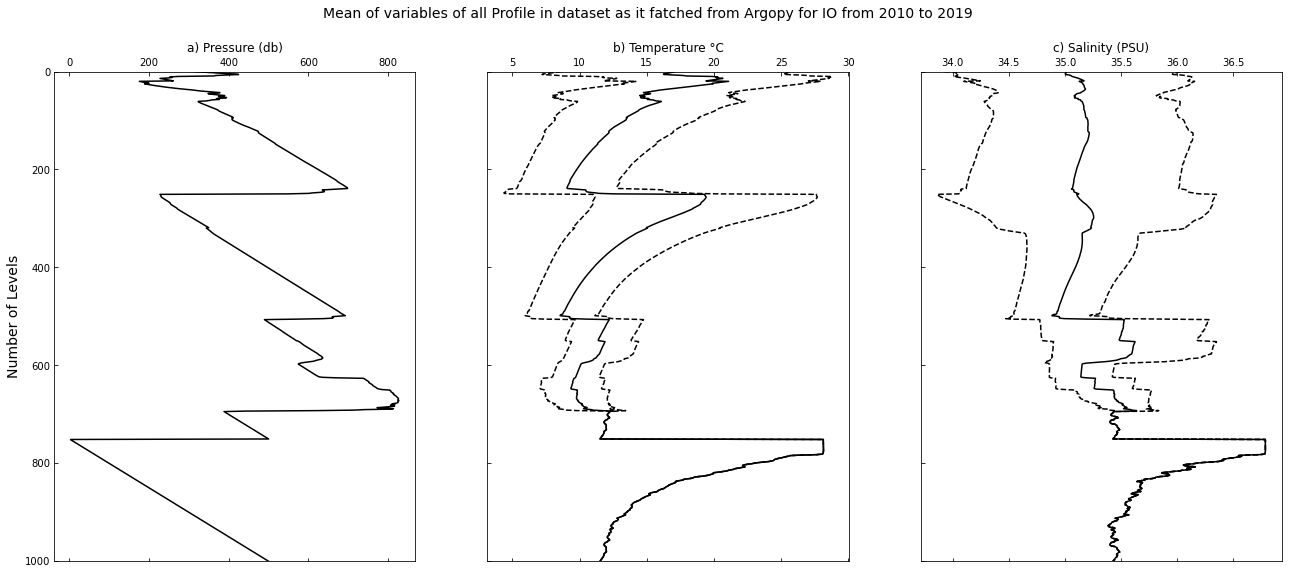

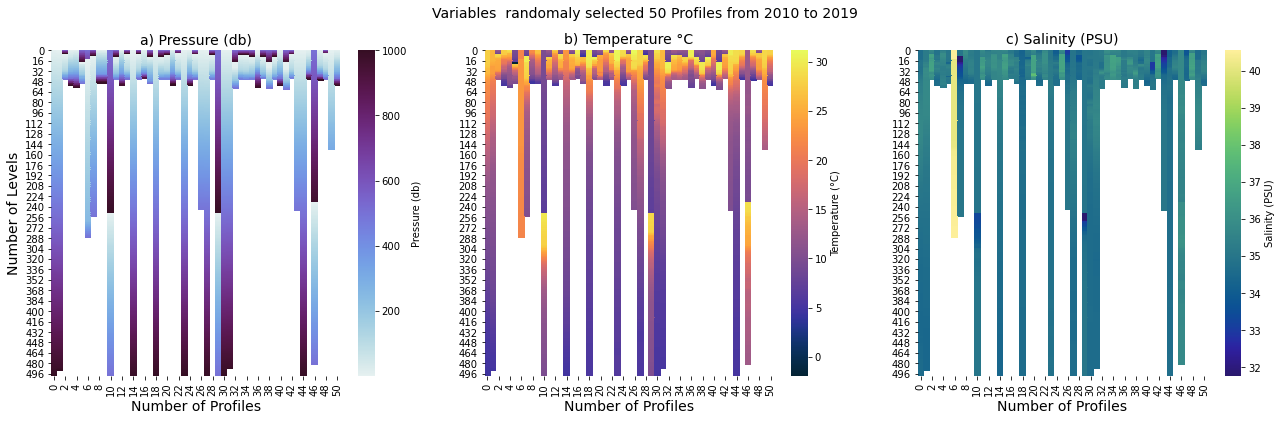

In [3]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=[22,9])
ax1.plot(ds7['PRES'].mean(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k')
ax1.set_title('a) Pressure (db)',fontsize=12)
ax1.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

Press=ds7['TEMP'].mean(dim=['N_PROF']).values
ax2.plot(Press,ds7['N_LEVELS'].values,'k')
ax2.plot(Press-ds7['TEMP'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax2.plot(Press+ds7['TEMP'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax2.set_title('b) Temperature °C',fontsize=12)
ax2.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

sal=ds7['PSAL'].mean(dim=['N_PROF']).values
ax3.plot(sal,ds7['N_LEVELS'].values,'k')
ax3.plot(sal-ds7['PSAL'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax3.plot(sal+ds7['PSAL'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax3.set_title('c) Salinity (PSU)',fontsize=12)
ax3.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

plt.ylim(1000,0)
ax1.set_ylabel('Number of Levels',fontsize=14)
fig.suptitle('Mean of variables of all Profile in dataset as it fatched from Argopy for IO from 2010 to 2019', fontsize= 14)

# fig.tight_layout()
# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/unsorted_data.jpg',dpi=300,bbox_inches='tight')



# Plots of unsorted data

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=False,figsize=[22,6])

ax1.set_title('a) Pressure (db)',fontsize=14)
sns.heatmap(ds7['PRES'][100000:100051,0:500].transpose(),cmap=cmocean.cm.dense, cbar_kws={'label': 'Pressure (db)'},ax=ax1)

ax2.set_title('b) Temperature °C',fontsize=14)
sns.heatmap(ds7['TEMP'][100000:100051,0:500].transpose(),cmap=cmocean.cm.thermal, cbar_kws={'label': 'Temperature (°C)'},ax=ax2)

ax3.set_title('c) Salinity (PSU)',fontsize=14)
sns.heatmap(ds7['PSAL'][100000:100051,0:500].transpose(),cmap=cmocean.cm.haline, cbar_kws={'label': 'Salinity (PSU)'},ax=ax3)


ax1.set_ylabel('Number of Levels',fontsize=14)
ax1.set_xlabel('Number of Profiles',fontsize=14)
ax2.set_xlabel('Number of Profiles',fontsize=14)
ax3.set_xlabel('Number of Profiles',fontsize=14)

# fig.tight_layout()

fig.suptitle('Variables  randomaly selected 50 Profiles from 2010 to 2019', fontsize= 14)

# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/sorted_data_nointer.jpg',dpi=300,bbox_inches='tight')

## Sorting data
    keeping Pressure values as reference and considering fact that pressure increases as we go down in ocean.

In [4]:
# Sorting the data


df_press=pd.DataFrame(ds7['PRES'].values)


data=np.array(df_press.values)
a = np.array([[0, 5], [3, 2]])  


a=data


indices = np.argsort(a, axis=1) 


data1=np.take_along_axis(ds7['TEMP'].values, indices, axis=1) 
data2=np.take_along_axis(ds7['PSAL'].values, indices, axis=1)  
data3=np.take_along_axis(ds7['PRES'].values, indices, axis=1)  


ds7['TEMP'].values=data1.copy()
ds7['PSAL'].values=data2.copy()
ds7['PRES'].values=data3.copy()



Text(0.5, 0.98, 'Variables  randomaly selected 50 Profiles from 2010 to 2019')

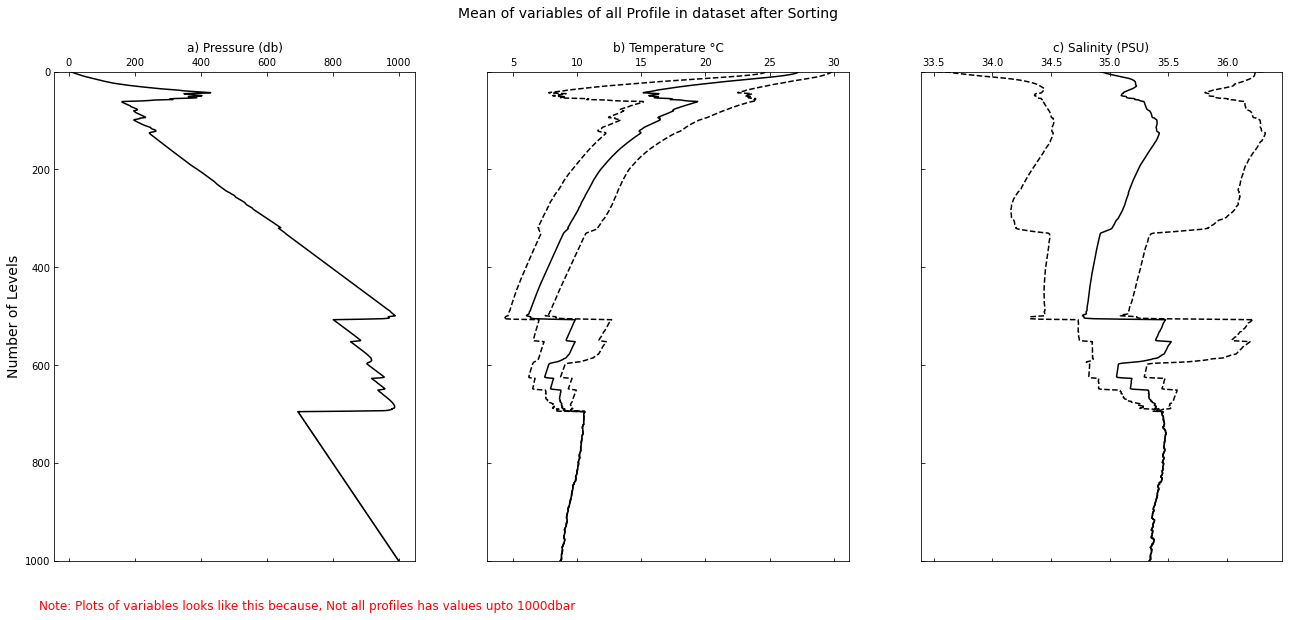

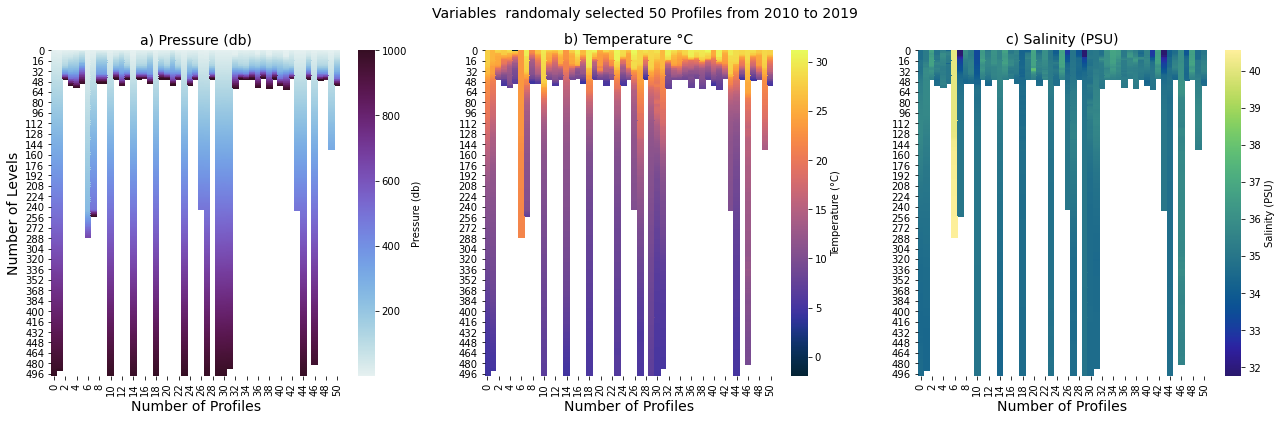

In [5]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=[22,9])
ax1.plot(ds7['PRES'].mean(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k')
ax1.set_title('a) Pressure (db)',fontsize=12)
ax1.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

Press=ds7['TEMP'].mean(dim=['N_PROF']).values
ax2.plot(Press,ds7['N_LEVELS'].values,'k')
ax2.plot(Press-ds7['TEMP'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax2.plot(Press+ds7['TEMP'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax2.set_title('b) Temperature °C',fontsize=12)
ax2.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

sal=ds7['PSAL'].mean(dim=['N_PROF']).values
ax3.plot(sal,ds7['N_LEVELS'].values,'k')
ax3.plot(sal-ds7['PSAL'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax3.plot(sal+ds7['PSAL'].std(dim=['N_PROF']).values,ds7['N_LEVELS'].values,'k--')
ax3.set_title('c) Salinity (PSU)',fontsize=12)
ax3.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

plt.ylim(1000,0)
ax1.text(0.7,-0.1, "Note: Plots of variables looks like this because, Not all profiles has values upto 1000dbar", size=12, ha="center", 
         transform=ax1.transAxes, color='red')
ax1.set_ylabel('Number of Levels',fontsize=14)
fig.suptitle('Mean of variables of all Profile in dataset after Sorting', fontsize= 14)

# fig.tight_layout()
# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/unsorted_data.jpg',dpi=300,bbox_inches='tight')



# Plots of unsorted data

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=False,figsize=[22,6])

ax1.set_title('a) Pressure (db)',fontsize=14)
sns.heatmap(ds7['PRES'][100000:100051,0:500].transpose(),cmap=cmocean.cm.dense, cbar_kws={'label': 'Pressure (db)'},ax=ax1)

ax2.set_title('b) Temperature °C',fontsize=14)
sns.heatmap(ds7['TEMP'][100000:100051,0:500].transpose(),cmap=cmocean.cm.thermal, cbar_kws={'label': 'Temperature (°C)'},ax=ax2)

ax3.set_title('c) Salinity (PSU)',fontsize=14)
sns.heatmap(ds7['PSAL'][100000:100051,0:500].transpose(),cmap=cmocean.cm.haline, cbar_kws={'label': 'Salinity (PSU)'},ax=ax3)


ax1.set_ylabel('Number of Levels',fontsize=14)
ax1.set_xlabel('Number of Profiles',fontsize=14)
ax2.set_xlabel('Number of Profiles',fontsize=14)
ax3.set_xlabel('Number of Profiles',fontsize=14)

# fig.tight_layout()

fig.suptitle('Variables  randomaly selected 50 Profiles from 2010 to 2019', fontsize= 14)

# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/sorted_data_nointer.jpg',dpi=300,bbox_inches='tight')

### Note:
Up to here, Data (values of Temperature and Salinity) is sorted based on the pressure values, where pressure increasing as we go down.

For my research purpose I want data to start from 0dbar (i.e. surface) to 1000dbar level at every 5dbar space, but since not all profiles has values upto exact 1000dbar (even fetching upto 1000 dbar). So, we will remove those profiles which has minimum value grater than 30dbar and maximum values greater than 970dbar  for the purpose of interpolation and extrapolation.

In [6]:
ds11=ds7

In [7]:
temp=pd.DataFrame(ds11['TEMP'].values)
pres=pd.DataFrame(ds11['PRES'].values)
psal=pd.DataFrame(ds11['PSAL'].values)

In [8]:
df_temp = pd.DataFrame(ds11['TEMP'].values)
list1 = df_temp.iloc[(df_temp.values < 0)].index

df_PRES = pd.DataFrame(ds11['PRES'].values)
list2 = df_temp.iloc[(df_temp.values < 0)].index

df_PSAL = pd.DataFrame(ds11['PSAL'].values)
list3 = df_temp.iloc[(df_temp.values < 0)].index

In [9]:
temp_index_badvalues=(pd.DataFrame(list1)).drop_duplicates()[0].values
pres_index_badvalues=(pd.DataFrame(list2)).drop_duplicates()[0].values
salinity_index_badvalues=(pd.DataFrame(list3)).drop_duplicates()[0].values

In [10]:
df_pres = pd.DataFrame(ds11['PRES'].values)

In [11]:
pres_min_max=pd.DataFrame({'min':df_pres.T.min(),'max':df_pres.T.max()})

In [12]:
# pres_min_max[pres_min_max['min']>30].index.values

In [13]:
less1=pres_min_max[pres_min_max['min']>30].index.values
less2=pres_min_max[pres_min_max['max']<970].index.values

In [14]:
qq1=np.append(temp_index_badvalues,pres_index_badvalues)
qq2=np.append(less1,less2)

In [15]:
qq3=np.append(qq1,qq2)
qq3.sort()
qq3

array([     4,      7,     11, ..., 163116, 163117, 163127])

In [16]:
ds72=ds7.reset_index('N_PROF')

In [17]:
ds72=ds72.drop_isel(N_PROF=[qq3[:]])

Text(0.5, 0.98, 'Variables  randomaly selected 50 Profiles from 2010 to 2019')

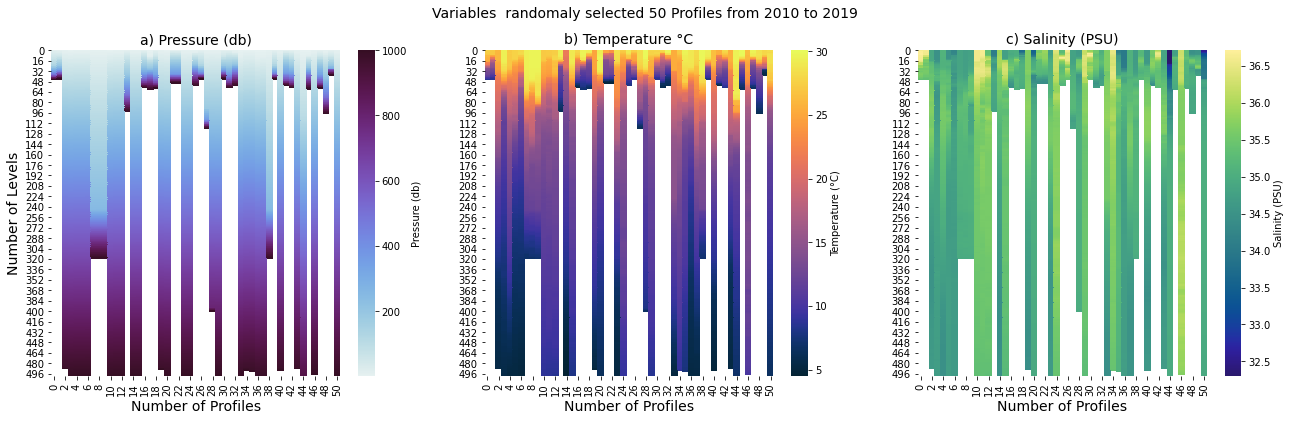

In [18]:

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=False,figsize=[22,6])

ax1.set_title('a) Pressure (db)',fontsize=14)
sns.heatmap(ds72['PRES'][100000:100051,0:500].transpose(),cmap=cmocean.cm.dense, cbar_kws={'label': 'Pressure (db)'},ax=ax1)

ax2.set_title('b) Temperature °C',fontsize=14)
sns.heatmap(ds72['TEMP'][100000:100051,0:500].transpose(),cmap=cmocean.cm.thermal, cbar_kws={'label': 'Temperature (°C)'},ax=ax2)

ax3.set_title('c) Salinity (PSU)',fontsize=14)
sns.heatmap(ds72['PSAL'][100000:100051,0:500].transpose(),cmap=cmocean.cm.haline, cbar_kws={'label': 'Salinity (PSU)'},ax=ax3)


ax1.set_ylabel('Number of Levels',fontsize=14)
ax1.set_xlabel('Number of Profiles',fontsize=14)
ax2.set_xlabel('Number of Profiles',fontsize=14)
ax3.set_xlabel('Number of Profiles',fontsize=14)

# fig.tight_layout()

fig.suptitle('Variables  randomaly selected 50 Profiles from 2010 to 2019', fontsize= 14)

# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/sorted_data_nointer.jpg',dpi=300,bbox_inches='tight')

In [19]:
ds72.where(ds72['PRES']<0,drop=True)

<xarray.Dataset>
Dimensions:                (N_LEVELS: 9, N_PROF: 60)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 6 7 8
    LATITUDE               (N_PROF) float64 20.8 20.58 20.25 ... 3.883 4.053 4.2
    LONGITUDE              (N_PROF) float64 65.36 65.51 65.84 ... 79.69 79.41
    TIME                   (N_PROF) datetime64[ns] 2014-05-09T05:54:00 ... 20...
    N_PROF_                (N_PROF) int64 10052 10053 10054 ... 3534 3535 3536
Dimensions without coordinates: N_PROF
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
    CYCLE_NUMBER           (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
    DATA_MODE              (N_PROF, N_LEVELS) object A A A nan ... nan nan nan
    DIRECTION              (N_PROF, N_LEVELS) object A A A nan ... nan nan nan
    PLATFORM_NUMBER        (N_PROF, N_LEVELS) float64 2.902e+06 ... nan
    POSITION_QC            (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
    ...                     ...
    PRES_QC                (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
    PSAL                   (N_PROF, N_LEVELS) float32 36.65 36.65 ... nan nan
    PSAL_QC                (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
    TEMP                   (N_PROF, N_LEVELS) float32 29.41 29.38 ... nan nan
    TEMP_QC                (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
    TIME_QC                (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... nan nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [20]:
ds28=ds72

In [21]:
ds29=ds72

In [22]:
ds72

<xarray.Dataset>
Dimensions:                (N_LEVELS: 1002, N_PROF: 120416)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 ... 997 998 999 1000 1001
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 1170 8905 3095
Dimensions without coordinates: N_PROF
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    DATA_MODE              (N_PROF) object ...
    DIRECTION              (N_PROF) object ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    ...                     ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 33.87 33.87 ... nan nan
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 27.67 27.67 ... nan nan
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [24]:
from scipy.interpolate import interp1d
from scipy import interpolate

In [25]:
new_p=np.arange(0.0,1005.0,5)
new_p

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,
        135.,  140.,  145.,  150.,  155.,  160.,  165.,  170.,  175.,
        180.,  185.,  190.,  195.,  200.,  205.,  210.,  215.,  220.,
        225.,  230.,  235.,  240.,  245.,  250.,  255.,  260.,  265.,
        270.,  275.,  280.,  285.,  290.,  295.,  300.,  305.,  310.,
        315.,  320.,  325.,  330.,  335.,  340.,  345.,  350.,  355.,
        360.,  365.,  370.,  375.,  380.,  385.,  390.,  395.,  400.,
        405.,  410.,  415.,  420.,  425.,  430.,  435.,  440.,  445.,
        450.,  455.,  460.,  465.,  470.,  475.,  480.,  485.,  490.,
        495.,  500.,  505.,  510.,  515.,  520.,  525.,  530.,  535.,
        540.,  545.,  550.,  555.,  560.,  565.,  570.,  575.,  580.,
        585.,  590.,  595.,  600.,  605.,  610.,  615.,  620.,  625.,
        630.,  635.,

In [26]:
for i in range (0,120416):
    f1 = interpolate.interp1d((ds28['PRES'][i,0:int(ds28['PRES'][i].argmax())].values), 
                              (ds28['TEMP'][i,0:int(ds28['PRES'][i].argmax())].values), fill_value='extrapolate')
    
    f2 = interpolate.interp1d((ds28['PRES'][i,0:int(ds28['PRES'][i].argmax())].values), 
                              (ds28['PSAL'][i,0:int(ds28['PRES'][i].argmax())].values), fill_value='extrapolate')
    
    f1(new_p)
    f2(new_p)
    
    ds29['PRES'][i,0:201]=new_p.copy()
    ds29['TEMP'][i,0:201]=f1(new_p).copy()
    ds29['PSAL'][i,0:201]=f2(new_p).copy()

   

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: invalid value encountered in true_divide

In [34]:
ds29

<xarray.Dataset>
Dimensions:                (N_LEVELS: 1002, N_PROF: 120416)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 ... 997 998 999 1000 1001
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 1170 8905 3095
Dimensions without coordinates: N_PROF
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    DATA_MODE              (N_PROF) object ...
    DIRECTION              (N_PROF) object ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    ...                     ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 33.87 33.87 ... nan nan
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 27.67 27.67 ... nan nan
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [36]:
ds31=ds29.sel(N_LEVELS=slice(0,200))

In [37]:
ds31

<xarray.Dataset>
Dimensions:                (N_LEVELS: 201, N_PROF: 120416)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 196 197 198 199 200
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 1170 8905 3095
Dimensions without coordinates: N_PROF
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    DATA_MODE              (N_PROF) object ...
    DIRECTION              (N_PROF) object ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    ...                     ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 33.87 33.87 ... 35.17
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 27.67 27.67 ... 7.76 7.783
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

Text(0.5, 1.0, 'Temperature Recorded by Argos from 01/2011-03/2011')

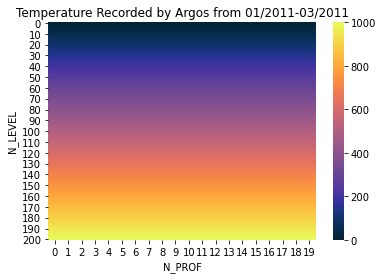

In [42]:
sns.heatmap(ds31['PRES'][0:20].transpose(),cmap=cmocean.cm.thermal)
plt.xlabel('N_PROF')
plt.ylabel('N_LEVEL')

plt.title('Temperature Recorded by Argos from 01/2011-03/2011', fontsize=12)

In [45]:
df3=pd.DataFrame(ds31['TEMP'][:].values)

rows_with_nan = []
for index, row in df3.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)
        

rows_with_nan

[680, 33060, 38285, 39151, 46330, 59826, 67025, 73632, 89921, 104589]

In [53]:
ds32=ds31.drop_isel(N_PROF=[rows_with_nan[:]])

Text(0.5, 0.98, 'Variables randomaly selected 50 Profiles from 2010 to 2019')

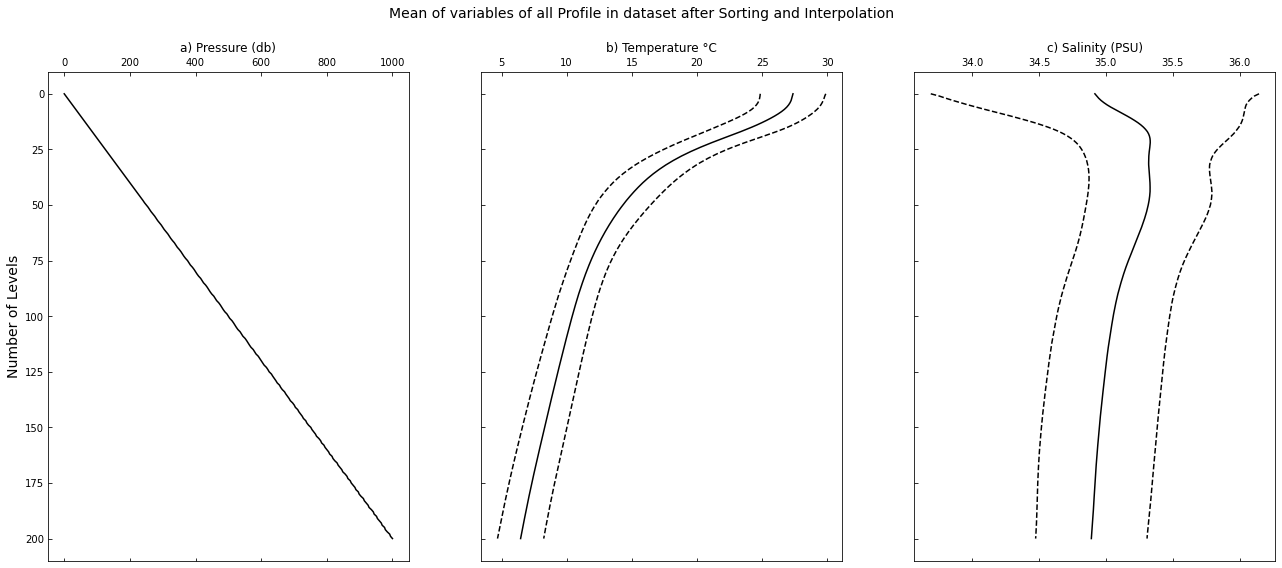

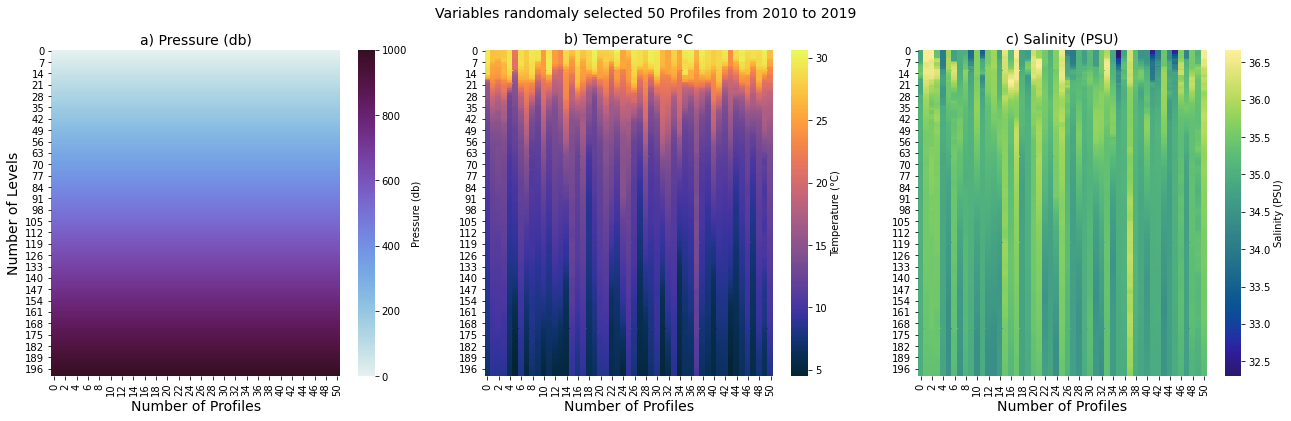

In [62]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=[22,9])
ax1.plot(ds32['PRES'].mean(dim=['N_PROF']).values,ds32['N_LEVELS'].values,'k')
ax1.set_title('a) Pressure (db)',fontsize=12)
ax1.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

Press=ds32['TEMP'].mean(dim=['N_PROF']).values
ax2.plot(Press,ds32['N_LEVELS'].values,'k')
ax2.plot(Press-ds32['TEMP'].std(dim=['N_PROF']).values,ds32['N_LEVELS'].values,'k--')
ax2.plot(Press+ds32['TEMP'].std(dim=['N_PROF']).values,ds32['N_LEVELS'].values,'k--')
ax2.set_title('b) Temperature °C',fontsize=12)
ax2.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

sal=ds32['PSAL'].mean(dim=['N_PROF']).values
ax3.plot(sal,ds32['N_LEVELS'].values,'k')
ax3.plot(sal-ds32['PSAL'].std(dim=['N_PROF']).values,ds32['N_LEVELS'].values,'k--')
ax3.plot(sal+ds32['PSAL'].std(dim=['N_PROF']).values,ds32['N_LEVELS'].values,'k--')
ax3.set_title('c) Salinity (PSU)',fontsize=12)
ax3.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in')

# plt.ylim(1000,0)
# ax1.text(0.7,-0.1, "Note: Plots of variables looks like this because, Not all profiles has values upto 1000dbar", size=12, ha="center", 
#          transform=ax1.transAxes, color='red')
ax1.set_ylabel('Number of Levels',fontsize=14)
plt.gca().invert_yaxis()
fig.suptitle('Mean of variables of all Profile in dataset after Sorting and Interpolation', fontsize= 14)

# fig.tight_layout()
# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/unsorted_data.jpg',dpi=300,bbox_inches='tight')



# Plots of unsorted data

fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=False,figsize=[22,6])

ax1.set_title('a) Pressure (db)',fontsize=14)
sns.heatmap(ds32['PRES'][100000:100051,0:500].transpose(),cmap=cmocean.cm.dense, cbar_kws={'label': 'Pressure (db)'},ax=ax1)

ax2.set_title('b) Temperature °C',fontsize=14)
sns.heatmap(ds32['TEMP'][100000:100051,0:500].transpose(),cmap=cmocean.cm.thermal, cbar_kws={'label': 'Temperature (°C)'},ax=ax2)

ax3.set_title('c) Salinity (PSU)',fontsize=14)
sns.heatmap(ds32['PSAL'][100000:100051,0:500].transpose(),cmap=cmocean.cm.haline, cbar_kws={'label': 'Salinity (PSU)'},ax=ax3)


ax1.set_ylabel('Number of Levels',fontsize=14)
ax1.set_xlabel('Number of Profiles',fontsize=14)
ax2.set_xlabel('Number of Profiles',fontsize=14)
ax3.set_xlabel('Number of Profiles',fontsize=14)

# fig.tight_layout()

fig.suptitle('Variables randomaly selected 50 Profiles from 2010 to 2019', fontsize= 14)

# plt.savefig('/home/cccr/shikha/MAYUR/Project/Results/sorted_data_nointer.jpg',dpi=300,bbox_inches='tight')